In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import csv
import json
import os
import xgboost.sklearn as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [2]:
#从文件load到numpy array
data_dir = 'preprocessed_add_diff'
#读入训练数据
x_train = np.load(os.path.join(data_dir,'x_train.npy'))
x_validation = np.load(os.path.join(data_dir,'x_validation.npy'))
y_train = np.load(os.path.join(data_dir,'y_train.npy'))
y_validation = np.load(os.path.join(data_dir,'y_validation.npy'))
#读入测试数据
x_test = np.load(os.path.join(data_dir,'x_test.npy'))
id_test = np.load(os.path.join(data_dir,'id_test.npy'))

print(x_test[0])
print(id_test[0])

[   1.           30.            0.            0.            0.
   22.            1.           99.8          69.53         50.38
  190.            0.            4.           19.            0.
    2.            0.            0.            0.            1.
    0.          281.            0.           74.          807.
    0.            0.            2.           30.27         49.42
  -90.2          19.15       -120.47        139.62        141.50007089
  194.2390035    52.2513089   135.32502919   36.40314136  369.79369404
    0.        ]
7171737d49b143d1b38883a39e4a5730


In [3]:
print(len(x_test[0]))
print(len(x_train[0]))

41
41


In [4]:
cat_cols = ['用户实名制是否通过核实', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户', 
       '缴费用户当前是否欠费缴费', '是否经常逛商场的人',
       '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影', '当月是否景点游览',
       '当月是否体育场馆消费', 
           ]
all_cols = ['用户实名制是否通过核实', '用户年龄', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户', '用户网龄（月）',
       '用户最近一次缴费距今时长（月）', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）',
       '用户当月账户余额（元）', '缴费用户当前是否欠费缴费', '用户话费敏感度', '当月通话交往圈人数', '是否经常逛商场的人',
       '近三个月月均商场出现次数', '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影', '当月是否景点游览',
       '当月是否体育场馆消费', '当月网购类应用使用次数', '当月物流快递类应用使用次数', '当月金融理财类应用使用总次数',
       '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数', '当月旅游资讯类应用使用次数',
       '1', '2', '3','4','5','6','7','8','9','10','11','12','top_up_amount_offline'
           ]
        
num_features = len(x_test[0]) + 1
print("num_features:",num_features)

num_features: 42


In [5]:
from sklearn.metrics import f1_score
targetlabel_1 = [0, 1, 2]

import lightgbm as lgb
lgb_train = lgb.Dataset(x_train,label = y_train,feature_name=all_cols, categorical_feature = cat_cols)
lgb_eval = lgb.Dataset(x_validation,label = y_validation,feature_name=all_cols, categorical_feature = cat_cols)
            
print("begin build")        
params = {
            'task': 'train',
            'boosting_type': 'gbdt',
            'objective': 'regression_l1',
            'max_depth': 5,
            'num_leaves': 31,
            'lambda_l1' : 0,
            'lambda_l2': 5,
            'learning_rate': 0.01,
            'feature_fraction': 0.5,
            'bagging_fraction': 0.8,
            'bagging_freq': 2,
            'verbose': 0,
            'bagging_seed' :2019,
            'feature_fraction_seed':2019,
            #'seed': 66,
            'num_threads' : -1,
            'metric': 'l1',
         }
print("begin fit")    
model_1 = lgb.train(params,
                    lgb_train,
                    num_boost_round=10000,
                    valid_sets=lgb_eval,
                    verbose_eval=10,
                    early_stopping_rounds=200,
                   )



begin build
begin fit
Training until validation scores don't improve for 200 rounds.
[10]	valid_0's l1: 30.9825


D:\Python\Anaconda3\lib\site-packages\lightgbm\basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
D:\Python\Anaconda3\lib\site-packages\lightgbm\basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[20]	valid_0's l1: 29.3788
[30]	valid_0's l1: 28.0531
[40]	valid_0's l1: 26.7805
[50]	valid_0's l1: 25.617
[60]	valid_0's l1: 24.5754
[70]	valid_0's l1: 23.488
[80]	valid_0's l1: 22.6134
[90]	valid_0's l1: 21.8361
[100]	valid_0's l1: 21.1399
[110]	valid_0's l1: 20.5234
[120]	valid_0's l1: 19.9424
[130]	valid_0's l1: 19.4807
[140]	valid_0's l1: 18.9845
[150]	valid_0's l1: 18.5356
[160]	valid_0's l1: 18.1832
[170]	valid_0's l1: 17.8983
[180]	valid_0's l1: 17.5902
[190]	valid_0's l1: 17.3317
[200]	valid_0's l1: 17.0668
[210]	valid_0's l1: 16.8515
[220]	valid_0's l1: 16.678
[230]	valid_0's l1: 16.5139
[240]	valid_0's l1: 16.3786
[250]	valid_0's l1: 16.2371
[260]	valid_0's l1: 16.0976
[270]	valid_0's l1: 15.9841
[280]	valid_0's l1: 15.8851
[290]	valid_0's l1: 15.7981
[300]	valid_0's l1: 15.7208
[310]	valid_0's l1: 15.6528
[320]	valid_0's l1: 15.594
[330]	valid_0's l1: 15.5226
[340]	valid_0's l1: 15.4691
[350]	valid_0's l1: 15.4267
[360]	valid_0's l1: 15.3855
[370]	valid_0's l1: 15.3506
[380

[2900]	valid_0's l1: 14.6315
[2910]	valid_0's l1: 14.6313
[2920]	valid_0's l1: 14.631
[2930]	valid_0's l1: 14.6308
[2940]	valid_0's l1: 14.6308
[2950]	valid_0's l1: 14.6308
[2960]	valid_0's l1: 14.6303
[2970]	valid_0's l1: 14.6305
[2980]	valid_0's l1: 14.6301
[2990]	valid_0's l1: 14.6297
[3000]	valid_0's l1: 14.6295
[3010]	valid_0's l1: 14.6293
[3020]	valid_0's l1: 14.6294
[3030]	valid_0's l1: 14.6294
[3040]	valid_0's l1: 14.6293
[3050]	valid_0's l1: 14.6284
[3060]	valid_0's l1: 14.6285
[3070]	valid_0's l1: 14.629
[3080]	valid_0's l1: 14.6292
[3090]	valid_0's l1: 14.6292
[3100]	valid_0's l1: 14.6291
[3110]	valid_0's l1: 14.6285
[3120]	valid_0's l1: 14.6276
[3130]	valid_0's l1: 14.6276
[3140]	valid_0's l1: 14.6273
[3150]	valid_0's l1: 14.6274
[3160]	valid_0's l1: 14.6269
[3170]	valid_0's l1: 14.6272
[3180]	valid_0's l1: 14.6266
[3190]	valid_0's l1: 14.6269
[3200]	valid_0's l1: 14.6269
[3210]	valid_0's l1: 14.6271
[3220]	valid_0's l1: 14.6273
[3230]	valid_0's l1: 14.628
[3240]	valid_0's 

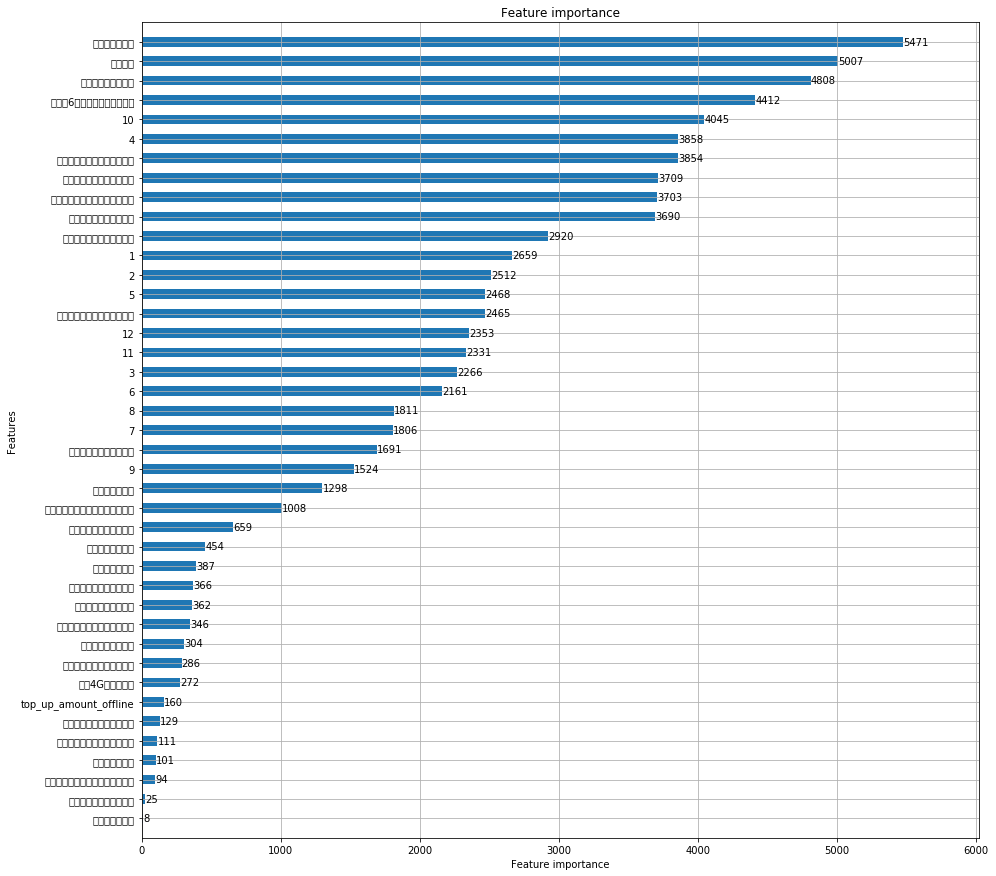

mae_validation:
14.6278
result_validation:
0.06398853325484073


In [6]:
fig_1,ax_1 = plt.subplots(figsize=(15,15))
lgb.plot_importance(model_1,
                height=0.5,
                ax=ax_1,
                max_num_features=90)
plt.show()

### make prediction for test data
y_predicted_float = model_1.predict(x_validation, num_iteration=model_1.best_iteration)
y_predicted = [0]* len(y_predicted_float)
for index in range(len(y_predicted_float)):
    y_predicted[index] = int(round(y_predicted_float[index]))
    
from sklearn.metrics import mean_absolute_error

mae_validation = mean_absolute_error(y_validation, y_predicted)

print("mae_validation:")
print(mae_validation)
print("result_validation:")
result_validation = 1 / (1 + mae_validation)
print(result_validation)

In [7]:
### make prediction for test data
import warnings
warnings.filterwarnings("ignore")


print("begin predict")
y_predicted_test_float = model_1.predict(x_test, num_iteration=model_1.best_iteration)
y_predicted_test = [0]* len(y_predicted_test_float)
for index in range(len(y_predicted_test_float)):
    y_predicted_test[index] = int(round(y_predicted_test_float[index]))
print(y_predicted_test[0])

begin predict
602


In [8]:
print(x_test[0][1])
print(x_test[1])
print(x_test[2])

30.0
[  1.          70.           0.           0.           0.
  84.           0.           0.          12.89        34.06
  20.           0.           5.          23.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.         -12.89       -34.06
 -20.         -21.17        -7.11       -14.06         0.
   0.           0.          36.76554478  61.38095238  57.0450656
   0.        ]
[   1.           35.            0.            0.            0.
  237.            0.            0.          161.71        171.09
  120.            0.            2.          206.            0.
   84.            1.            0.            1.            1.
    1.          186.            0.          943.          261.
    0.            0.            0.         -161.71       -171.09
 -120.           -9.38         41.71        -51.09          0.
    0.            0.           93.96827242  133.6446281    6

In [9]:
header = [('id','score')]

with open('lgb_submission_1.csv', 'w') as f:
    writer = csv.writer(f,lineterminator='\n',delimiter= ",")
    writer.writerows(header)
    for i in range(len(id_test)):
        writer.writerows([(id_test[i],y_predicted_test[i])])

print('done')

done
